### Telecom churn Dataset
#### Abstract
#### AutoML:

Auto ml selects the best model for our dataset by evaluating many models for us.

Here below we are going to use AUTOML to predict the gender of person using other variables such as height,weight,age and obesity level etc (ie: multiple classification will be done here).

By performing automl we will get the imp variables and the most effective model for our dataset as well.

In [2]:
#Installing H20
!pip install h2o

     |████████████████████████████████| 177.4 MB 48 kB/s  eta 0:00:01    |████▋                           | 25.3 MB 396 kB/s eta 0:06:24     |███████▎                        | 40.4 MB 212 kB/s eta 0:10:46     |███████████████▊                | 87.1 MB 207 kB/s eta 0:07:15
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=fc3b99129ecd95c170e639352fd4e5e126f4c98504d6d50f281b7ba6127d097a
  Stored in directory: /Users/nikhilbindal/Library/Caches/pip/wheels/6a/61/e9/fc16eec83a229e4b5256e44978505cff2fe032c4e111a920dd
Successfully built h2o


In [23]:
# import the library
# importing H20 automl 
#It can do data prepossesing it self like categorical encoding coversion etc. 
#So there is no need to create duplicates and can take care of missing value imputation and other data cleaning activities.
#mine
import h2o
from h2o.automl import H2OAutoML
import os
import pandas as pd

In [24]:
h2o.init()
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 52 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_nikhilbindal_6t9qnj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.973 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [25]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("./telecom_churn.csv", sep = ",")
data.name = "data"
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [26]:
#checking correlation between variables
data.corr().unstack().sort_values().drop_duplicates()

Number vmail messages  Churn                -0.089728
Churn                  Total intl calls     -0.052844
Area code              Total intl calls     -0.024179
Total eve minutes      Total day calls      -0.021451
Total eve charge       Total day calls      -0.021449
                                               ...   
Total intl minutes     Total intl charge     0.999993
Total night minutes    Total night charge    0.999999
Total eve charge       Total eve minutes     1.000000
Total day charge       Total day minutes     1.000000
Account length         Account length        1.000000
Length: 137, dtype: float64

In [27]:
#Importing our dataset with H2O.
df = h2o.import_file('./telecom_churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [28]:
df.types

{'State': 'enum',
 'Account length': 'int',
 'Area code': 'int',
 'International plan': 'enum',
 'Voice mail plan': 'enum',
 'Number vmail messages': 'int',
 'Total day minutes': 'real',
 'Total day calls': 'int',
 'Total day charge': 'real',
 'Total eve minutes': 'real',
 'Total eve calls': 'int',
 'Total eve charge': 'real',
 'Total night minutes': 'real',
 'Total night calls': 'int',
 'Total night charge': 'real',
 'Total intl minutes': 'real',
 'Total intl calls': 'int',
 'Total intl charge': 'real',
 'Customer service calls': 'int',
 'Churn': 'enum'}

In [29]:
df.describe()

Rows:3333
Cols:20

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
type,enum,int,int,enum,enum,int,real,int,real,real,int,real,real,int,real,real,int,real,int,enum
mins,,1.0,408.0,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.2,33.0,1.04,0.0,0.0,0.0,0.0,
mean,,101.06480648064806,437.18241824182417,,,8.099009900990099,179.77509750975094,100.43564356435644,30.56230723072307,200.98034803480348,100.1143114311431,17.0835403540354,200.87203720372037,100.10771077107712,9.03932493249325,10.237293729372938,4.4794479447944795,2.7645814581458144,1.562856285628563,
maxs,,243.0,510.0,,,51.0,350.8,165.0,59.64,363.7,170.0,30.91,395.0,175.0,17.77,20.0,20.0,5.4,9.0,
sigma,,39.822105928595604,42.371290485606615,,,13.688365372038596,54.46738920237137,20.069084207300897,9.2594345539305,50.713844425811985,19.922625293943103,4.310667643110341,50.57384701365836,19.56860934605856,2.275872837660029,2.791839548408416,2.461214270546094,0.7537726126630461,1.3154910448664765,
zeros,,0,0,,,2411,2,2,2,1,1,1,0,0,0,18,18,18,697,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,KS,128.0,415.0,No,Yes,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.7,1.0,False
1,OH,107.0,415.0,No,Yes,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.7,1.0,False
2,NJ,137.0,415.0,No,No,0.0,243.4,114.0,41.38,121.2,110.0,10.3,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False


In [30]:
#Splitting our dataset into 3 datasets, one for training, other for testing and last one for validation purposes. (0.7,0.15,0.15 split)
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])

In [31]:
df_train

State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False
NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,Yes,No,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.7,0,False
MO,147,415,Yes,No,0,157,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
WV,141,415,Yes,Yes,37,258.6,84,43.96,222,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
VT,93,510,No,No,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,False
VA,76,510,No,Yes,33,189.7,66,32.25,212.8,65,18.09,165.7,108,7.46,10,5,2.7,1,False


In [32]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = "Churn"
x = df.columns
x.remove(y)

In [33]:
#Using H2O automl
#Setting models thresold to "10", more models we use it takes more time to come up with the best model and hyperparameters. 
#To create a simpler model we are excluding "StackedEnsemble" and "DeepLearning", tho they are really good. 
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)
#taken from references

In [34]:
#starting the automl process
#It will test all the 10 models and update the leading model according to performance.
#We can see for the variable importance at the end as well. Gives us rough Idea of which 
#variable will it be using for the prediction purposes. 
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)
#taken from references

AutoML progress: |
17:50:03.442: Project: AutoML_2_20221108_175003
17:50:03.442: Cross-validation disabled by user: no fold column nor nfolds > 1.
17:50:03.442: Setting stopping tolerance adaptively based on the training frame: 0.020901483117353754
17:50:03.442: Build control seed: 10
17:50:03.442: training frame: Frame key: AutoML_2_20221108_175003_training_py_11_sid_9e9e    cols: 20    rows: 2289  chunks: 16    size: 118837  checksum: -8164713426207398242
17:50:03.442: validation frame: Frame key: py_13_sid_9e9e    cols: 20    rows: 509  chunks: 16    size: 75092  checksum: 9193036801889406183
17:50:03.443: leaderboard frame: Frame key: py_13_sid_9e9e    cols: 20    rows: 509  chunks: 16    size: 75092  checksum: 9193036801889406183
17:50:03.443: blending frame: NULL
17:50:03.443: response column: Churn
17:50:03.443: fold column: null
17:50:03.443: weights column: null
17:50:03.443: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 9

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: XRT_1_AutoML_2_20221108_175003


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          114789                 14           20           18.1          121           222           161.3

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.05993053665534744
RMSE: 0.244807141757236
LogLoss: 0.46788507974219057
Mean Per-Class Error: 0.12946076384054944
AUC: 0.8989133293114917
AUCPR: 0.8009073238240803
Gini: 0.7978266586229834

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32960371971130376
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  1897     62      0.0316   (62.0/1959.0)
True   75       255     0.2273   (75.0/330.0)
Total  1972     317     0.0599   (137.0/2289.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.329604     0.788253  143
max f2                       0.279412     0.791517  161
max f0point5                 0.411765     0.809558  125
max accuracy                 0.329604     0.940149  143
max precision                1            1         0
max recall                   0            1         399
max specificity              1            1         0
max absolute_mcc             0.329604     0.753625  143
max min_per_class_accuracy   0.170635     0.848485  212
max mean_per_class_accuracy  0.244444     0.878957  174
max tns                      1            1959      0
max fns                      1            322       0
max fps                      0            1959      399
max tps                      0            330       399
max tnr                      1            1         0
max fnr                      1            0.975758  0
max fpr                      0            1         399
max tpr                      0            1         399

Gains/Lift Table: Avg response rate: 14.42 %, avg score: 13.75 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100481                   0.923736           6.93636   6.93636            1                0.96544      1                           0.96544             0.069697        0.069697                   593.636   593.636            0.069697
2        0.0200961                   0.850479           6.93636   6.93636            1                0.884482     1                           0.924961            0.069697        0.139394                   593.636   593.636            0.139394
3        0.0301442                   0.769628           6.3332    6.73531            0.913043         0.807678     0.971014                    0.885867            0.0636364       0.20303                    533.32    573.531            0.202009
4        0.0406291                   0.705882           6.35833   6.63803            0.916667         0.731827     0.956989                    0.846115            0.0666667       0.269697                   535.833   563.803            0.267655
5        0.0502403                   0.642857           6.30579   6.57447            0.909091         0.659853     0.947

In [35]:
#Creates the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
#We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well. 
#Here from the leaderboard we have "GBM_5_AutoML_1_20221107_231030	" as the leader(best performing) model .

lb = aml.leaderboard

In [36]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XRT_1_AutoML_2_20221108_175003,0.931635,0.20399,0.862278,0.102965,0.22787,0.0519247
XGBoost_2_AutoML_2_20221108_175003,0.928886,0.178369,0.851756,0.131134,0.213551,0.045604
XGBoost_3_AutoML_2_20221108_175003,0.924529,0.163795,0.86524,0.107724,0.197713,0.0390906
DRF_1_AutoML_2_20221108_175003,0.923066,0.311034,0.858204,0.125426,0.224193,0.0502623
XGBoost_1_AutoML_2_20221108_175003,0.922889,0.193487,0.846547,0.107338,0.224257,0.050291
GBM_3_AutoML_2_20221108_175003,0.921715,0.195697,0.842831,0.128658,0.222462,0.0494893
GBM_4_AutoML_2_20221108_175003,0.913322,0.201132,0.834626,0.137035,0.223477,0.0499419
GBM_2_AutoML_2_20221108_175003,0.907582,0.199011,0.829129,0.141794,0.222355,0.0494417
GBM_1_AutoML_2_20221108_175003,0.905332,0.2371,0.749722,0.170718,0.260166,0.0676865
GLM_1_AutoML_2_20221108_175003,0.809956,0.326296,0.444797,0.25045,0.31352,0.0982949


In [37]:
#Using the leader model for prediction. 
OverWeight_pred=aml.leader.predict(df_test)
#taken from references

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [38]:
OverWeight_pred.head()
#predicitions

predict,False,True
False,0.82,0.18
True,0.693333,0.306667
False,0.991368,0.0086317
False,0.86,0.14
False,0.997778,0.00222222
False,0.9,0.1
False,0.992918,0.00708235
False,0.92,0.08
False,0.919385,0.0806154
False,0.97089,0.0291101


In [39]:
aml.leader.model_performance(df_test)
#creating a performance report for the leading model (GBM_5_AutoML_1_20221107_231030)

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.06369645392721818
RMSE: 0.25238156415875185
LogLoss: 0.2774313698734232
Mean Per-Class Error: 0.10801970602487482
AUC: 0.9364534539385129
AUCPR: 0.8529974160166475
Gini: 0.8729069078770257

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2482051277160644
       False    True    Error    Rate
-----  -------  ------  -------  ------------
False  438      15      0.0331   (15.0/453.0)
True   15       67      0.1829   (15.0/82.0)
Total  453      82      0.0561   (30.0/535.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.248205     0.817073  63
max f2                       0.201429     0.817536  70
max f0point5                 0.388777     0.867347  41
max accuracy                 0.248205     0.943925  63
max precision                0.977838     1         0
max recall                   0            1         311
max specificity              0.977838     1         0
max absolute_mcc             0.248205     0.783961  63
max min_per_class_accuracy   0.16         0.865854  81
max mean_per_class_accuracy  0.201429     0.893138  70
max tns                      0.977838     453       0
max fns                      0.977838     81        0
max fps                      0            453       311
max tps                      0            82        311
max tnr                      0.977838     1         0
max fnr                      0.977838     0.987805  0
max fpr                      0            1         311
max tpr                      0            1         311

Gains/Lift Table: Avg response rate: 15.33 %, avg score: 12.56 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.011215                    0.86555            6.52439    6.52439            1                0.929279     1                           0.929279            0.0731707       0.0731707                  552.439   552.439            0.0731707
2        0.0205607                   0.7448             6.52439    6.52439            1                0.795227     1                           0.868347            0.0609756       0.134146                   552.439   552.439            0.134146
3        0.0317757                   0.63992            5.43699    6.1406             0.833333         0.683833     0.941176                    0.803224            0.0609756       0.195122                   443.699   514.06             0.192914
4        0.0411215                   0.596073           6.52439    6.22783            1                0.615506     0.954545                    0.760561            0.0609756       0.256098                   552.439   522.783            0.25389
5        0.0504673                   0.5565             6.52439    6.28275            1                0.574886     0.962963                    0.726177            0.0609756       0.317073                   552.439   528.275            0.314866
6        0.100935                    0.372              6.0411     6.16192            0.925926         0.46644      0.944444                    0.596308            0.304878        0.621951                   504.11    516.192            0.615329
7        0.151402                    0.248921           3.62466    5.31617            0.555556         0.302771     0.814815                    0.498463            0.182927        0.804878                   262.466   431.617            0.

In [40]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [41]:
model_ids

['XRT_1_AutoML_2_20221108_175003',
 'XGBoost_2_AutoML_2_20221108_175003',
 'XGBoost_3_AutoML_2_20221108_175003',
 'DRF_1_AutoML_2_20221108_175003',
 'XGBoost_1_AutoML_2_20221108_175003',
 'GBM_3_AutoML_2_20221108_175003',
 'GBM_4_AutoML_2_20221108_175003',
 'GBM_2_AutoML_2_20221108_175003',
 'GBM_1_AutoML_2_20221108_175003',
 'GLM_1_AutoML_2_20221108_175003']

In [58]:
#Using confusion matrix
aml.leader.confusion_matrix()

,False,True,Error,Rate
False,1897.0,62.0,0.0316,(62.0/1959.0)
True,75.0,255.0,0.2273,(75.0/330.0)
Total,1972.0,317.0,0.0599,(137.0/2289.0)


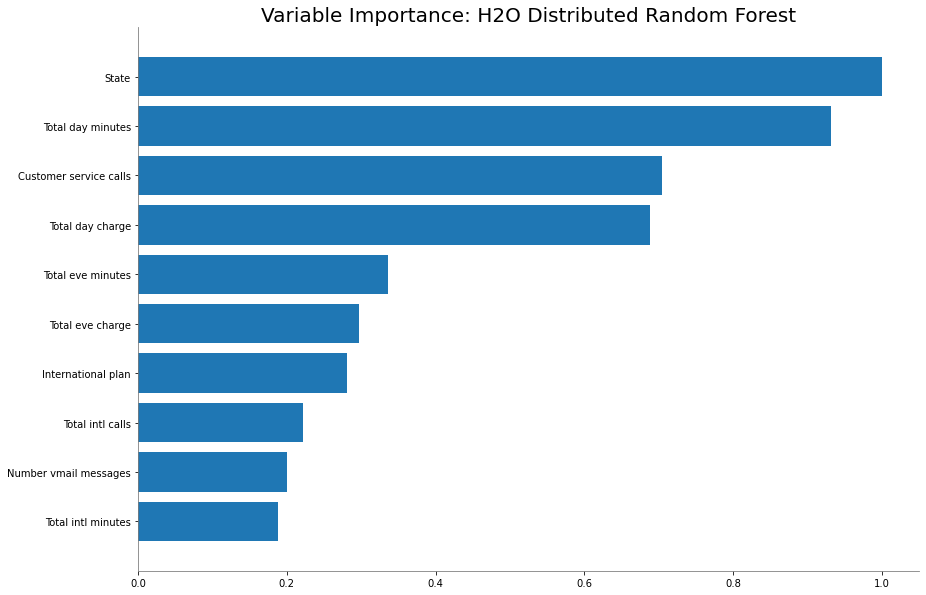

<Figure size 432x288 with 0 Axes>

In [43]:
aml.leader.varimp_plot()
#variance importance plot for the leader model.
#taken from references

In [44]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
#we are using xgboost model as well to predict, while it's still not in the top of the aml leader board.

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_2_20221108_175003


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.024804206404375112
RMSE: 0.1574935122612202
LogLoss: 0.1035964357130433
Mean Per-Class Error: 0.08132395934846165
AUC: 0.9869475768403794
AUCPR: 0.9576613418365504
Gini: 0.9738951536807587

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5169378519058228
       False    True    Error    Rate
-----  -------  ------  -------  -------------
False  1955     4       0.002    (4.0/1959.0)
True   53       277     0.1606   (53.0/330.0)
Total  2008     281     0.0249   (57.0/2289.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.516938     0.90671   144
max f2                       0.188504     0.894644  211
max f0point5                 0.586424     0.956615  134
max accuracy                 0.533935     0.975098  141
max precision                0.99778      1         0
max recall                   0.0271042    1         342
max specificity              0.99778      1         0
max absolute_mcc             0.533935     0.89641   141
max min_per_class_accuracy   0.142045     0.939255  236
max mean_per_class_accuracy  0.188504     0.941464  211
max tns                      0.99778      1959      0
max fns                      0.99778      327       0
max fps                      0.00106468   1959      399
max tps                      0.0271042    330       342
max tnr                      0.99778      1         0
max fnr                      0.99778      0.990909  0
max fpr                      0.00106468   1         399
max tpr                      0.0271042    1         342

Gains/Lift Table: Avg response rate: 14.42 %, avg score: 14.47 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100481                   0.988083           6.93636    6.93636            1                0.993181    1                           0.993181            0.069697        0.069697                   593.636   593.636            0.069697
2        0.0200961                   0.973146           6.93636    6.93636            1                0.980357    1                           0.986769            0.069697        0.139394                   593.636   593.636            0.139394
3        0.0301442                   0.951094           6.93636    6.93636            1                0.963129    1                           0.978889            0.069697        0.209091                   593.636   593.636            0.209091
4        0.0401922                   0.934776           6.93636    6.93636            1                0.943079    1                           0.969936            0.069697        0.278788                   593.636   593.636            0.278788
5        0.0502403                   0.90624            6.93636    6.93636            1                0.921214    1                           0.960192            0.069697        0.348485                   593.636   593.636            0.348485
6        0.100044                    0.716118           6.93636    6.93636            1                0.828683    1                           0.894725            0.345455        0.693939                   593.636   593.636            0.693939
7        0.150284                    0.253833           4.1

In [45]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [46]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_2_AutoML_2_20221108_175003',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_2_AutoML_2_20221108_175003'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20221108_175003_training_py_11_sid_9e9e',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20221108_175003_training_py_11_sid_9e9e'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_2_20221108_175003_training_py_11_sid_9e9e',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_2_20221108_175003_training_py_11_sid_9e9e'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    's

In [49]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 5.0,
  'nthread': 4,
  'seed': 13,
  'max_depth': 10,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.6,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 10000)

In [53]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_2_20221108_175003


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.024804206404375112
RMSE: 0.1574935122612202
LogLoss: 0.1035964357130433
Mean Per-Class Error: 0.08132395934846165
AUC: 0.9869475768403794
AUCPR: 0.9576613418365504
Gini: 0.9738951536807587

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5169378519058228
       False    True    Error    Rate
-----  -------  ------  -------  -------------
False  1955     4       0.002    (4.0/1959.0)
True   53       277     0.1606   (53.0/330.0)
Total  2008     281     0.0249   (57.0/2289.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.516938     0.90671   144
max f2                       0.188504     0.894644  211
max f0point5                 0.586424     0.956615  134
max accuracy                 0.533935     0.975098  141
max precision                0.99778      1         0
max recall                   0.0271042    1         342
max specificity              0.99778      1         0
max absolute_mcc             0.533935     0.89641   141
max min_per_class_accuracy   0.142045     0.939255  236
max mean_per_class_accuracy  0.188504     0.941464  211
max tns                      0.99778      1959      0
max fns                      0.99778      327       0
max fps                      0.00106468   1959      399
max tps                      0.0271042    330       342
max tnr                      0.99778      1         0
max fnr                      0.99778      0.990909  0
max fpr                      0.00106468   1         399
max tpr                      0.0271042    1         342

Gains/Lift Table: Avg response rate: 14.42 %, avg score: 14.47 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100481                   0.988083           6.93636    6.93636            1                0.993181    1                           0.993181            0.069697        0.069697                   593.636   593.636            0.069697
2        0.0200961                   0.973146           6.93636    6.93636            1                0.980357    1                           0.986769            0.069697        0.139394                   593.636   593.636            0.139394
3        0.0301442                   0.951094           6.93636    6.93636            1                0.963129    1                           0.978889            0.069697        0.209091                   593.636   593.636            0.209091
4        0.0401922                   0.934776           6.93636    6.93636            1                0.943079    1                           0.969936            0.069697        0.278788                   593.636   593.636            0.278788
5        0.0502403                   0.90624            6.93636    6.93636            1                0.921214    1                           0.960192            0.069697        0.348485                   593.636   593.636            0.348485
6        0.100044                    0.716118           6.93636    6.93636            1                0.828683    1                           0.894725            0.345455        0.693939                   593.636   593.636            0.693939
7        0.150284                    0.253833           4.1

In [59]:
#confusuion matrix for xgboost method
out.confusion_matrix()

,False,True,Error,Rate
False,1955.0,4.0,0.002,(4.0/1959.0)
True,53.0,277.0,0.1606,(53.0/330.0)
Total,2008.0,281.0,0.0249,(57.0/2289.0)


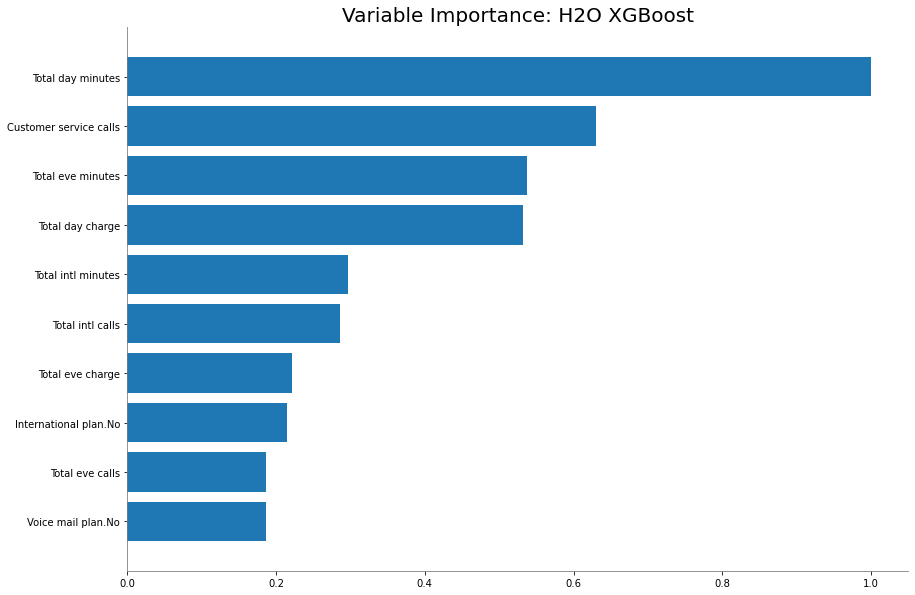

<Figure size 432x288 with 0 Axes>

In [55]:
out.varimp_plot()

**Conclusion**

**Evaluation:**  We can evaluate our model by using the above confusion matrix from it we can say that the error and rate of error in the cofusion matrix are significantly low suggesting that the model is working perfectly. 

Also while evaluating all the model we can see that present leader model has the least amount of **mean_per_class_error** and **log loss** as well. Which also suggests that our model fuctions perfectly.

The model also gives the most important variables as Total Day Minutes and Customer Service Calls suggesting cutomer churning dependence on it. Also we know since the model thats involved GBM handles Overfitting finely as well. Probably the reason h2o choose it in the first place.

**1. Is the relationship significant?**

Statistical significance means that there is a good chance that we are right in finding that a relationship exists between two variables. We can observe from above that the dependent variable is dependent on variables such as Total Day minutes, Total eve minutes and Total day charge. We can suggest that the relation ship is significant btw the dependant and independent variables.

**2. Are any model assumptions violated?**

To answer the above question we need to know answer to the below questions.

What Are the Assumptions of GBM(Gradient boosting model)?
1) Independence of observations

2) Assumptions related to the interaction depth. If set to 1, strictly additive model is assumed. As we increase the interaction depth, this assumption is relaxed.

What Are the Assumptions of XGBoost?

1)XGBoost may assume that encoded integer values for each input variable have an ordinal relationship
2)XGBoost assume that your data may not be complete (i.e. it can deal with missing values)

So from above we can say, that every while many variables are real in nature still they can be assumed into finite interval, there by it won't be problem assuming it is ordinal. Similary for GBM model every observation in the dataset as we know are differnt and not dependent on other observations as well. 

So, no assumptions of either GBM or XGBoost model are Violated here.

**3. Is there any multicollinearity in the model?**

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a  model. As we could see that there is so much colienarity between Total day minutes and Total day charges. Similarly for Total eve minutes and Total eve charges.

**4. In the multivariate models are predictor variables independent of all the other predictor variables?**

From above correlation we can see that<br>

Total eve charge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Total eve minutes&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.000000<br>
Total day charge &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Total day minutes&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.000000<br>
Account length &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; TAccount length &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.000000<br>
these variables are the one with correlation. and Independent variables have both zero covariance and correlation. While they may be dependent on each other a bit, It its still not significant enough to call them dependent variables.

**5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

**Most Importatnt Variables: **
1. Total day minutes
2. Customer service calls
3. Total eve minutes
4. Total day charge


are the most importatnt variables for predicitng the telecom customer churn.

**6. Does the model make sense?**

Yes as we can see that the obesity level depending on Total day charge, Customer service calls etc we can undersatad that the model in sensible.

**7. Does regularization help?**

Regularization helps by ignificantly reducing the variance of the model, without substantial increase in its bias. it is reducing the variance(hence avoiding overfitting), without loosing any important properties in the data.

**8. Which independent variables are significant?**

Total day charge, Customer service details are the significant variables of all.
Esp Total day charge is the most significant variable.

**9. Which hyperparameters are important?**

max_models and exclude_algos are the most important hyperparameters as they save us a lot of time here. 

**Reference**:

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_lending_club.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_model.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_Airlines_GBM_AutoML.ipynb